# Notebook 1: Introduction, Data Cleaning, and Data Exploration

This notebook contains the preliminary steps for the data analysis. All model-running and selecting are in Notebook 2. 

# Introduction  
  
A machine-learning model is proposed to predict 28-day mortality in patients with Acute Respiratory Distress Syndrome (ARDS).

### Acute Respiratory Distress Syndrome (ARDS) Background  
  
Acute respiratory distress syndrome (ARDS) affects ~228,900<sup>1</sup> people in the United States each year. Individuals with ARDS experience life-threatening symptoms due to poor oxygenation<sup>2</sup>. ARDS has a 43%<sup>1</sup> mortality rate. Treatment is indirect and involves supportive ventilation, prone positioning and sedation to prevent movement, allowing the lungs to heal<sup>3</sup>. Some ventilatory treatments may exacerbate the lung injury. 
  

Research has identified features to monitor to reduce lung damage including: Positive end-expiratory pressure (PEEP) and tidal volume (TV)<sup>1</sup>. Machine-learning provides the opportunity to combine the influence of many features for a comprehensive view of patient response. This may lead to the prediction of treatment response faster and/or more accurately.  
  
Due to the high and quick mortality of ARDS even with medical care, there is an identified need for the application of a machine-learning model to predict treatment response and mortality.

### Dataset Summary  
  
A retrospective study from a teaching hospital in Japan (n=197) studied differences between drug-associated ARDS (n=27) and non-drug-associated ARDS (n=170)<sup>4</sup>. The study was published in the British Journal of Medicine (BMJ) and the dataset was open-source and published by Dryad. The focus of the original study was to report the prognosis of drug-associated ARDS compared to non-drug associated ARDS. The conclusion of the study was more severe lung damage was observed in drug-associated ARDS patients But, ventilator weaning and prognosis was better than for non-drug associated ARDS patients. The proposed project focuses on creating a model that accurately predicts prognosis of all ARDS patients for use in treatment decisions.

### Feature Summary   
  
#### **Demographic Features**  
  
***Age***- (Years). Patient age at time of study.  
  
***Sex***- (Male/Female). Patient biological sex.  
  
#### **Blood Test Features**  
  
***Alb***- Albumin (g/dL). Albumin is a protein produced by the liver that prevents fluid from leaking out of the blood stream and assists in transporting hormones, vitamins and enzymes throughout the body. Low levels may indicate poor functioning liver or kidneys.  
  
***PLT***- Platelet count (per mm<sup>3</sup>). Platelets circulate in the blood stream and respond to damaged blood vessels. ARDS patients may have a low platelet count.  
  
***WBC***- White cell count (per mm<sup>3</sup>). White blood cells are a part of the immune system and help fight infections. Elevated counts may indicate underlying infection. Repressed counts may indicate an inability to fight infection.  
  
***CRP***- C reactive protein (mg/dL). CRP is a protein produced by the liver that causes inflammation. CRP levels in the blood may detect inflammation in acute diseases and monitor the severity of chronic diseases.  
  
***LDH***- Lactate dehydrogenase (IU/L). LDH is an enzyme that is released when there is tissue damage. High levels indicate tissue disease or injury.  
  
#### **ICU Scoring Systems**  
  
***APACHE II***- Acute Physiology And Chronic Health Evaluation II is used to enumerate the severity-of-disease. APACHE II is calculated at the beginning of ICU admission to assess patient mortality risk.  
  
***SOFA***- Sequential Organ Failure Assessment quantifies the number and severity of failed organs. The score is calculated on admission and updated every 24 hours.  
  
***McCabe***- (1/2/3). The McCabe score classifies patients into 3 categories: 1) non-fatal, 2) ultimately fatal and 3) rapidly fatal. This is a subjective score of the severity of underlying conditions.  
  
#### **Respiratory Tests and Ventilation**- 
  
***PaO<sub>2</sub>/FiO<sub>2</sub>***- The ratio of arterial oxygen partial pressure (PaO<sub>2</sub> in mmHg) to fractional inspired oxygen (FiO<sub>2</sub>) is an clinical indicator of hypoxemia (low-levels of arterial oxygen). Low levels can be an indicator of poor circulation and is an indicator of ARDS severity.  
  
***CT score***- A high-resolution CT score which indicates the degree of fibroproliferative lesions in the lungs. Fibroproliferation is the excessive accumulation of connective tissue and deterioration of tissue structure and function.  
  
***PEEP***- Positive End-Expiratory Pressure (cmH<sub>2</sub>). The positive pressure remaining in the airways after exhalation in patients under mechanical ventilation. PEEP is maintained to improve gas exchange during mechanical ventilation by decreasing the shunting of blood through the lungs. PEEP often lowers the necessary level of oxygen needed.  
  

***PIP***- Peak Inspiratory Pressure (cmH<sub>2</sub>). The pressure in the chest after inhalation. PIP increases with airway resistance and is elevated in ARDS patients.  
  
***TV***- Tidal Volume (mL). The volume of air moved between inhalation and exhalation. Ventilatory-induced lung injury has been found with high tidal volume in ARDS patients.  
  
***ventilator weaning = 1***- (0/1). The patient was able taken off of the ventilator (ventilator weaning = 1) or the patient remained on the ventilator for the duration of the 28-day study (ventilator weaning = 0).  
  
***VFD***- Ventilator-free days (days). The number of days that the patient was not using a ventilator.  
  

#### **Disease Cause**  
  
***DARDS = 1***- (0/1). ARDS may be caused by infectious diseases like pneumonia and sepsis. Some molecular target drugs have been found to also cause ARDS. The cause of ARDS drug-associated  (DARDS=1) or non-drug-associated ARDS (DARDS=0) may lead to different treatment response and clinical outcome.  
  
#### **Class Label**  
  
***death = 1***- (0/1). Whether the patient succumbed to the disease over the 28-day period. Alive after the 28-day period (death=0), Dead before the 28-day period (death=1).  
  
#### **Inferred Features**  
The journal article does not explicitly detail the following variables. However, educated inferences are possible to determine their meaning.
  
***days***-  Days alive (days). All patients who died have values less than 28 days. All patients who survived have values equal to 28 days.
  
***days.1***- Days on incubator (days). The days.1 feature + VFD feature = 28 days, the length of the study. 

# Data Intake and Initial Cleaning

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import cov

import sklearn as sk
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

import math

### Cleaning

First, let's take a look at the fresh-out-of-the-box data: 

In [3]:
# import unedited data
data_unedited = pd.read_csv("data_unedited.csv")

In [4]:
data_unedited

,Unnamed: 0,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,1.0,79.0,M,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,83.0,M,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,70.0,M,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,61.0,M,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,81.0,M,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's a little messy. There are a bunch of dummy columns after the pertinent ones called "unnamed: column number", and there are also 19 dummy rows below all of the records filled with NaNs. Let's start by getting rid of those dummy columns and rows. 

In [5]:
data = data_unedited[:197]
data = data.drop(columns = "Unnamed: 0")
data = data.drop(columns = [f"Unnamed: {a}" for a in range(22,72)])

In [6]:
data

,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,...,CT score,PEEP,PIP,TV,DARDS = 1,days,death = 1,days.1,ventilator weaning = 1,VFD
0,79.0,M,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,...,191.6,24.0,n.d.,n.d.,0.0,21.0,1.0,28.0,0.0,0.0
1,83.0,M,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,...,213.3,5.0,10,360,0.0,21.0,1.0,28.0,0.0,0.0
2,70.0,M,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,...,221.7,18.0,24,525,0.0,8.0,1.0,28.0,0.0,0.0
3,61.0,M,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,...,211.6,10.0,24,480,0.0,11.0,1.0,28.0,0.0,0.0
4,81.0,M,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,...,234.9,5.0,10,625,0.0,6.0,1.0,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,80.0,F,2.9,27.4,10600.0,13.0,15.0,3.0,1.0,160.0,...,349.7,8.0,9,450,1.0,28.0,0.0,12.0,1.0,16.0
193,63.0,F,2.7,10.3,10800.0,41.0,31.0,7.0,1.0,55.0,...,329.8,8.0,30,550,0.0,1.0,1.0,28.0,0.0,0.0
194,84.0,F,3.1,15.7,7500.0,13.4,16.0,7.0,1.0,121.0,...,343.0,10.0,8,320,1.0,28.0,0.0,7.0,1.0,21.0
195,69.0,F,2.3,12.7,15100.0,14.4,24.0,13.0,1.0,151.3,...,356.4,10.0,21,340,1.0,28.0,0.0,4.0,1.0,24.0


Great. Now we have to deal with the n.d. records and turn them into something we can work with - namely, NaNs. 

In [7]:
data.replace("n.d.", np.nan, inplace = True)
data.head()

,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,...,CT score,PEEP,PIP,TV,DARDS = 1,days,death = 1,days.1,ventilator weaning = 1,VFD
0,79.0,M,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,...,191.6,24.0,NaN,NaN,0.0,21.0,1.0,28.0,0.0,0.0
1,83.0,M,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,...,213.3,5.0,10,360,0.0,21.0,1.0,28.0,0.0,0.0
2,70.0,M,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,...,221.7,18.0,24,525,0.0,8.0,1.0,28.0,0.0,0.0
3,61.0,M,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,...,211.6,10.0,24,480,0.0,11.0,1.0,28.0,0.0,0.0
4,81.0,M,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,...,234.9,5.0,10,625,0.0,6.0,1.0,28.0,0.0,0.0


### Imputation

Now that we've dealt with formatting issues, let's take a look at how many missing values each feature has. 

In [8]:
data.isnull().sum(axis = 0)

age                        0
sex                        0
Alb                        0
PLT                        0
WBC                        0
CRP                        0
APACHE II                  0
SOFA                       0
McCabe                     0
PaO2/FiO2                  0
LDH                        0
CT score                   0
PEEP                       0
PIP                       43
TV                        58
DARDS = 1                  0
days                       0
death = 1                  0
days.1                     0
ventilator weaning = 1     0
VFD                        0
dtype: int64

Just two columns - 'TV' and 'PIP' are missing values. First, because of the missing values, the data type of these columns is object, so we'll change the data type to a numeric type. While we're at it, we'll change the sex column from M/F to 0/1 so we can calculate correlation coefficients later. After adjusting data types, we can figure out what to impute the missing values with by trying out a few things. 

In [9]:
data["PIP"] = pd.to_numeric(data["PIP"])
data["TV"] = pd.to_numeric(data["TV"])
data["sex"] = data["sex"].astype(str)
data = data.replace(['M', 'F'], [0, 1])
data["sex"] = pd.to_numeric(data["sex"])
data.dtypes

age                       float64
sex                         int64
Alb                       float64
PLT                       float64
WBC                       float64
CRP                       float64
APACHE II                 float64
SOFA                      float64
McCabe                    float64
PaO2/FiO2                 float64
LDH                       float64
CT score                  float64
PEEP                      float64
PIP                       float64
TV                        float64
DARDS = 1                 float64
days                      float64
death = 1                 float64
days.1                    float64
ventilator weaning = 1    float64
VFD                       float64
dtype: object

Here we determine the univariate characteristics of PIP and TV before imputation. We put the univariate characteristics that will likely be changed after imputing either the mean or median of the column into a dataframe called imput_compare. We will use this dataframe to compare which imputation value - mean or median - changes the characteristics of the feature the least. 

In [10]:
# initialize dataframe with univariate characteristics
imput_compare = [['mean'], ['median'], ['variance'], ['std dev'], ['1st quartile'], ['3rd quartile'], 
                 ['IQR'], ['num. outliers']]

# add univariate characteristics that will be affected by imputation 
# for each feature into the dataframe
for col in ['PIP', 'TV']:
    #imput_compare[0].append(col)
    #maxm = data[col].max()
    #minm = data[col].min()
    #imput_compare[1].append(math.trunc(maxm))
    #imput_compare[2].append(math.trunc(minm))
    #imput_compare[3].append(math.trunc(maxm-minm))
    
    imput_compare[0].append(math.trunc(data[col].mean()))
    imput_compare[1].append(math.trunc(data[col].median()))
    #imput_compare[6].append(round(data[col].mode(), 2))

    imput_compare[2].append(math.trunc(data[col].var()))
    imput_compare[3].append(math.trunc(data[col].std()))
    quartiles = data[col].quantile([0.25, 0.5, 0.75])
    first_q = int(quartiles[0.25])
    third_q = int(quartiles[0.75])
    iqr = int(quartiles[0.75]-quartiles[0.25])
    imput_compare[4].append(first_q)
    imput_compare[5].append(third_q)
    imput_compare[6].append(iqr)
    num_out = sum(data[col] > (third_q + 1.5*iqr)) + sum(data[col] < (first_q - 1.5*iqr))
    imput_compare[7].append(num_out)

# print dataframe at the end of this initial step
pd.DataFrame(imput_compare, columns = ["characteristic", 'PIP Pre_Imp', "TV Pre_Imp"])


,characteristic,PIP Pre_Imp,TV Pre_Imp
0,mean,25,428
1,median,22,420
2,variance,2412,11095
3,std dev,49,105
4,1st quartile,18,350
5,3rd quartile,25,492
6,IQR,7,142
7,num. outliers,3,1


Now we test out the imputation values by creating two copies of the data. In the first copy, impute the missing values with the means of the features. In the second copy, impute them out with the medians. 

In [11]:
# mean
data_mean = pd.DataFrame.copy(data)
data_mean.fillna(data_mean.mean(), inplace=True)

# median
data_med = pd.DataFrame.copy(data)
data_med.fillna(data_med.median(), inplace=True)

We put the characteristics of each of these post-imputed features into the
same dataframe from before, imput_compare, to compare pre-imputed characteristics with post-imputed characteristics. 

In [12]:
j = 2
for col in ['PIP', 'TV']:
    if col == 'TV' and j == 4: 
        j = 5 
    for frame in [data_mean, data_med]:
        imput_compare[0].insert(j, math.trunc(frame[col].mean()))
        imput_compare[1].insert(j, math.trunc(frame[col].median()))
        imput_compare[2].insert(j, math.trunc(frame[col].var()))
        imput_compare[3].insert(j, math.trunc(frame[col].std()))
        quartiles = frame[col].quantile([0.25, 0.5, 0.75])
        first_q = int(quartiles[0.25])
        third_q = int(quartiles[0.75])
        iqr = int(quartiles[0.75]-quartiles[0.25])
        imput_compare[4].insert(j, first_q)
        imput_compare[5].insert(j ,third_q)
        imput_compare[6].insert(j, iqr)
        num_out = sum(frame[col] > (third_q + 1.5*iqr)) + sum(frame[col] < (first_q - 1.5*iqr))
        imput_compare[7].insert(j, num_out)
        j += 1

In [14]:
pd.DataFrame(imput_compare, columns = ["characteristic", 'PIP Pre-Imputed', 
                                       'PIP Imputed with Mean', 
                                       'PIP Imputed with Median', 
                                       "TV Pre-Imputed", 
                                       'TV Imputed with Mean', 
                                       "TV Imputed with Median"])

,characteristic,PIP Pre-Imputed,PIP Imputed with Mean,PIP Imputed with Median,TV Pre-Imputed,TV Imputed with Mean,TV Imputed with Median
0,mean,25,25,25,428,428,425
1,median,22,24,22,420,428,420
2,variance,2412,1883,1886,11095,7812,7825
3,std dev,49,43,43,105,88,88
4,1st quartile,18,20,20,350,380,380
5,3rd quartile,25,25,24,492,450,450
6,IQR,7,5,4,142,70,70
7,num. outliers,3,24,25,1,18,18


For each feature missing values, the imputation value (mean or median) that resulted in the least change of the univariate characteristics was chosen. Below, those values are officially imputed into the data. 

In [15]:
data['PIP'].fillna(data['PIP'].mean(), inplace=True)
data['TV'].fillna(data['TV'].median(), inplace=True)
data.head()

,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,...,CT score,PEEP,PIP,TV,DARDS = 1,days,death = 1,days.1,ventilator weaning = 1,VFD
0,79.0,0,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,...,191.6,24.0,25.948052,420.0,0.0,21.0,1.0,28.0,0.0,0.0
1,83.0,0,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,...,213.3,5.0,10.000000,360.0,0.0,21.0,1.0,28.0,0.0,0.0
2,70.0,0,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,...,221.7,18.0,24.000000,525.0,0.0,8.0,1.0,28.0,0.0,0.0
3,61.0,0,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,...,211.6,10.0,24.000000,480.0,0.0,11.0,1.0,28.0,0.0,0.0
4,81.0,0,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,...,234.9,5.0,10.000000,625.0,0.0,6.0,1.0,28.0,0.0,0.0


# Data Exploration

This exploration section includes a look at correlations between pairs of features, correlations between each feature and the class labels, univariate analysis of all features, and anomaly detection. This information will be used to decide if any features or records need to be removed from the data for the analysis. 

### Class Label Distribution

First, put class labels into data_Y dataframe, and leave rest of the features in a dataframe renamed data_X. Then determine class label distribution. 

In [16]:
data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
data_Y = data["death"]
data_X = data.drop(['death'], axis = 1)
print("Class Label Distributions:")
print("Death = 1:", sum(data_Y == 1.0))
print("Death = 0:", sum(data_Y == 0.0))

Class Label Distributions:
Death = 1: 69
Death = 0: 128


### Pearson Correlation Coefficients Between Each Feature and Class Labels

The following cell looks at how correlated each of the features of the dataset is with the class label feature. A correlation coefficient of 1 or -1 would indicate perfect correlation, whereas a correlation coefficient of 0 would indicate a complete lack of correlation. If a feature is too highly correlated with the class labels (we decided that "too highly" would be a coefficient above 0.5 or below -0.5) then it should be removed from the dataset. 

In [153]:
for col in data_X: 
    corr, corr2 = pearsonr(data_X[col], data_Y)
    print(col, '   ', round(corr,2))

age     0.15
sex     -0.09
Alb     -0.19
PLT     -0.14
WBC     0.02
CRP     0.09
APACHE II     0.08
SOFA     0.09
McCabe     0.12
PaO2/FiO2     -0.04
LDH     0.16
CT score     0.24
PEEP     0.08
PIP     -0.07
TV     0.04
DARDS = 1     -0.14
days     -0.9
days.1     0.65
ventilator weaning = 1     -0.68
VFD      -0.63


### Pearson Correlation Coefficients Between Features

Similarly, the following cell calculates the correlation coefficient between pairs of features, and coefficients above 0.5 or below -0.5 are highlighted below the cell. This further informed our decision to remove certain variables from the dataset. 

In [109]:
found = []
for col1 in data_X: 
    for col2 in data_X: 
        corr, corr2 = pearsonr(data_X[col1], data_X[col2])
        corr = round(corr, 2)
        if ((corr > .5) and (corr < .98)) or ((corr < -.5) and (corr>-.98)): 
            if corr not in found: 
                print(col1, " & ", col2, " : ", corr)
        found.append(corr)

APACHE II  &  SOFA  :  0.6
days  &  days.1  :  -0.62
days  &  ventilator weaning = 1  :  0.65
days.1  &  ventilator weaning = 1  :  -0.9
ventilator weaning = 1  &  VFD   :  0.91


### Correlation Coefficient Summary

Both sets of correlation coefficients identified four features that are highly correlated both with each other and with the class labels: "days", "days.1", "ventilator weaning = 1", and "VFD". Moreover, all of the features are gathered only after the class label, or life/death status of the patient, has been determined, so they could not practically be used to predict the outcome of a patient before the outcome is known. For both of these reasons, these four features are removed from the dataset. 

In [17]:
data_x = data.drop(["days.1","ventilator weaning = 1", "VFD ","days"], axis=1)
column_names = list(data_x.columns)

### Standard Statistics for Each Feature

This cell outputs a list of the standard statistics for all features in the dataset. Variables with outliers are highlighted later. 

In [18]:
for col in data_X:
    print('\nfeature:', col)
    
    maxm = data_X[col].max()
    minm = data_X[col].min()
    print('max:', math.trunc(maxm))
    print('min:', math.trunc(minm))
    print('range:', math.trunc(maxm-minm))

    print("(Measures of Central Tendency)")
    print('mean:', math.trunc(data_X[col].mean()))
    print('median:', math.trunc(data_X[col].median()))
    print('mode:', (data_X[col].mode()))

    print("(Measures of Dispersion)")
    print('variance:', math.trunc(data_X[col].var()))
    print('standard deviation:', math.trunc(data_X[col].std()))
    quartiles = data_X[col].quantile([0.25, 0.5, 0.75])
    first_q = int(quartiles[0.25])
    third_q = int(quartiles[0.75])
    iqr = int(quartiles[0.75]-quartiles[0.25])
    print('first quartile:', first_q)
    print('third quartile:', third_q)
    print('inner quartile range:', iqr)
    num_out = sum(data_X[col] > (third_q + 1.5*iqr)) + sum(data_X[col] < (first_q - 1.5*iqr))
    print('number of outliers:', num_out)


feature: age
max: 97
min: 19
range: 78
(Measures of Central Tendency)
mean: 73
median: 76
mode: 0    83.0
dtype: float64
(Measures of Dispersion)
variance: 142
standard deviation: 11
first quartile: 67
third quartile: 83
inner quartile range: 16
number of outliers: 7

feature: sex
max: 1
min: 0
range: 1
(Measures of Central Tendency)
mean: 0
median: 0
mode: 0    0
dtype: int64
(Measures of Dispersion)
variance: 0
standard deviation: 0
first quartile: 0
third quartile: 1
inner quartile range: 1
number of outliers: 0

feature: Alb
max: 4
min: 1
range: 3
(Measures of Central Tendency)
mean: 2
median: 2
mode: 0    3.1
dtype: float64
(Measures of Dispersion)
variance: 0
standard deviation: 0
first quartile: 2
third quartile: 3
inner quartile range: 0
number of outliers: 91

feature: PLT
max: 57
min: 0
range: 57
(Measures of Central Tendency)
mean: 19
median: 18
mode: 0    20.1
dtype: float64
(Measures of Dispersion)
variance: 111
standard deviation: 10
first quartile: 11
third quartile: 26

### Noteworthy Variables - Univariate Analysis

***Sex***

In [115]:
print("Male:", sum(data_X["sex"] == 0))
print("Female:", sum(data_X["sex"] == 1))

Male: 123
Female: 74


***Age***

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 67
third quartile: 83
inner quartile range: 16
number of outliers: 7


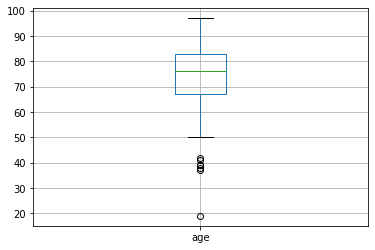

In [22]:
print(data_X.boxplot('age'))
quartiles = data_X['age'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['age'] > (third_q + 1.5*iqr)) + sum(data_X['age'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

***LDH***

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 254
third quartile: 461
inner quartile range: 207
number of outliers: 11


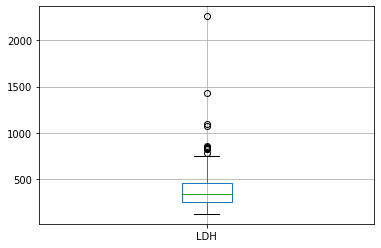

In [117]:
print(data_X.boxplot('LDH'))
quartiles = data_X['LDH'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['LDH'] > (third_q + 1.5*iqr)) + sum(data_X['LDH'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

***PEEP***

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 8
third quartile: 10
inner quartile range: 2
number of outliers: 33


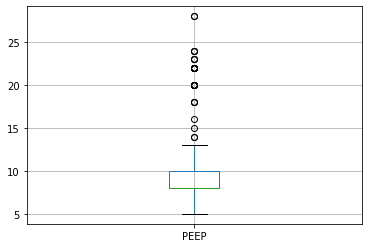

In [120]:
print(data_X.boxplot('PEEP'))
quartiles = data_X['PEEP'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['PEEP'] > (third_q + 1.5*iqr)) + sum(data_X['PEEP'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

***PIP***

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 20
third quartile: 25
inner quartile range: 5
number of outliers: 24


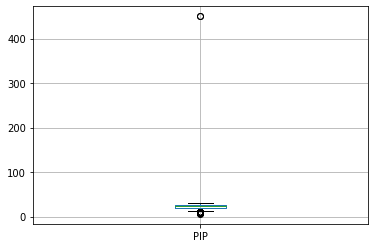

In [121]:
print(data_X.boxplot('PIP'))
quartiles = data_X['PIP'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['PIP'] > (third_q + 1.5*iqr)) + sum(data_X['PIP'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

***TV***

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 380
third quartile: 450
inner quartile range: 70
number of outliers: 18


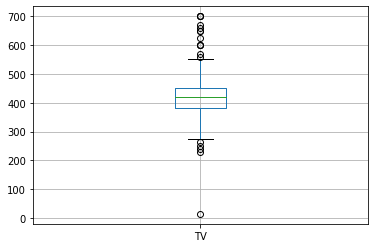

In [122]:
print(data_X.boxplot('TV'))
quartiles = data_X['TV'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['TV'] > (third_q + 1.5*iqr)) + sum(data_X['TV'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

### Univariate Analysis Summary

While a few features had some outliers, we noted that in the case of this dataset for people with ARDS, wide ranges of test results may actually be relatively normal. Because of this, we decided to not remove any univariate outliers but instead use anomaly detection to identify multivariate outliers and remove those. 

# Anomaly Detection

This section uses the relative density and isolation forest anomaly detection algorithms because they are both appropriate for our labeled dataset. Anomalies detected by both of the algorithms were removed from the dataset. 

In [156]:
from sklearn.model_selection import train_test_split

### Relative Density

In [170]:
anom = sk.neighbors.LocalOutlierFactor()
anom1_results = anom.fit_predict(data_X)
anom1_indices = []
for i in range(len(anom1_results)): 
    if anom1_results[i] == (-1): 
        anom1_indices.append(i)
print("Indices of anomalous records identified by the relative density algorithm:\n\n", 
      anom1_indices)

Indices of anomalous records identified by the relative density algorithm:

 [18, 26, 63, 70, 94, 96, 103, 135, 138, 143, 144, 145, 159, 162, 166, 169, 170, 175, 180, 189]


C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


### Isolation Forest

In [171]:
anom2 = sk.ensemble.IsolationForest()
anom2_results = anom2.fit_predict(data_X)
anom2_indices = []
for i in range(len(anom2_results)): 
    if anom2_results[i] == (-1): 
        anom2_indices.append(i)
print("Indices of anomalous records identified by the relative density algorithm:\n\n", 
      anom2_indices)

Indices of anomalous records identified by the relative density algorithm:

 [18, 59, 75, 78, 105, 127, 128, 135, 136, 148, 154, 162, 163, 172, 179, 181, 184, 189, 193, 195]


C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


### Anomalies Identified by Both Algorithms

In [172]:
ind_to_remove = []
for i in range(len(anom1_indices)): 
    if anom1_indices[i] in anom2_indices: 
        ind_to_remove.append(anom1_indices[i])
print("indices to remove:", ind_to_remove)

indices to remove: [18, 135, 162, 189]


Remove those records from the dataset. 

In [130]:
indexes_to_drop = [18, 135, 162, 189]
for ind in indexes_to_drop:
    data = data.drop(data.index[ind])

# Summary of Data Intake, Cleaning, and Exploration

The function below performs all of the intake and cleaning done in this notebook starting from the completely unedited dataset. It returns a tuple of the two dataframes, data_X and data_Y, that can be easily put into machine learning algorithms. This function is called intake_data and is available in the utils.py file. 

In [ ]:
def intake_data(method = 0, upsample = True):
    data_unedited = pd.read_csv("data_unedited.csv")
    data = data_unedited[:197]
    data = data.drop(columns = "Unnamed: 0")
    data = data.drop(columns = [f"Unnamed: {a}" for a in range(22,72)])
    data.replace("n.d.", np.nan, inplace = True)
    data["PIP"] = pd.to_numeric(data["PIP"])
    data["TV"] = pd.to_numeric(data["TV"]) 
    data["sex"] = data["sex"].astype(str)
    data = data.replace(['M', 'F'], [0, 1])
    data["sex"] = pd.to_numeric(data["sex"])
    data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
    imputation_methods = [data.mean, data.median]

    data.fillna(imputation_methods[method](), inplace=True)

    # these are the anomalies detected in the exploration notebook file 
    indexes_to_drop = [18, 135, 162, 189]
    for ind in indexes_to_drop:
      data = data.drop(data.index[ind])

    data_x = data.drop(["death","days.1","ventilator weaning = 1", "VFD ","days"], axis=1)
    data_y = data["death"]
    column_names = list(data_x.columns)
    
    if not upsample:
        return (data_x, data_y)
    try:
        from imblearn import over_sampling
    except Exception as e:
        print(f"looks like imblearn isn't installed! skipping upsampling: {str(e)}")
        return (data_x, data_y)
        
    oversample = over_sampling.SMOTE()
    X_SMOTE, Y_SMOTE = oversample.fit_resample(data_x, data_y)
    x_frame = pd.DataFrame(X_SMOTE)
    x_frame.columns = column_names
    return (x_frame, Y_SMOTE)